# 4. Data Preprocessing

## 4.1 Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

## 4.2 Import Cleaned Dataset

In [ ]:
df = pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')

In [ ]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

## 4.3 Train Test Split

In [ ]:
df.drop(['day','month','year'], axis=1, inplace=True)

In [ ]:
# Encoding Not fire as 0 and Fire as 1
df['Classes']= np.where(df['Classes']== 'not fire',0,1)

In [ ]:
X = df.drop('FWI',axis=1)
y= df['FWI']

In [ ]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [ ]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.657325,-0.357016,-0.365941,0.684556,0.482965,0.349021,0.618172,0.447959,0.512299,0.296033
RH,-0.657325,1.000000,0.262581,0.275592,-0.653649,-0.393893,-0.203883,-0.712353,-0.333027,-0.446906,-0.427696
Ws,-0.357016,0.262581,1.000000,0.204035,-0.226129,-0.010158,0.079699,-0.018845,0.023680,-0.108246,-0.191245
Rain,-0.365941,0.275592,0.204035,1.000000,-0.589465,-0.300364,-0.302591,-0.347660,-0.308258,-0.393221,-0.086938
FFMC,0.684556,-0.653649,-0.226129,-0.589465,1.000000,0.621958,0.528275,0.742079,0.606527,0.773444,0.267099
DMC,0.482965,-0.393893,-0.010158,-0.300364,0.621958,1.000000,0.884417,0.680918,0.984222,0.629505,0.175711
DC,0.349021,-0.203883,0.079699,-0.302591,0.528275,0.884417,1.000000,0.501412,0.951157,0.562431,-0.080660
ISI,0.618172,-0.712353,-0.018845,-0.347660,0.742079,0.680918,0.501412,1.000000,0.632285,0.747764,0.312299
BUI,0.447959,-0.333027,0.023680,-0.308258,0.606527,0.984222,0.951157,0.632285,1.000000,0.624037,0.079373
Classes,0.512299,-0.446906,-0.108246,-0.393221,0.773444,0.629505,0.562431,0.747764,0.624037,1.000000,0.201988


#### Checking multicollinearlity and remove highly corrrelated features

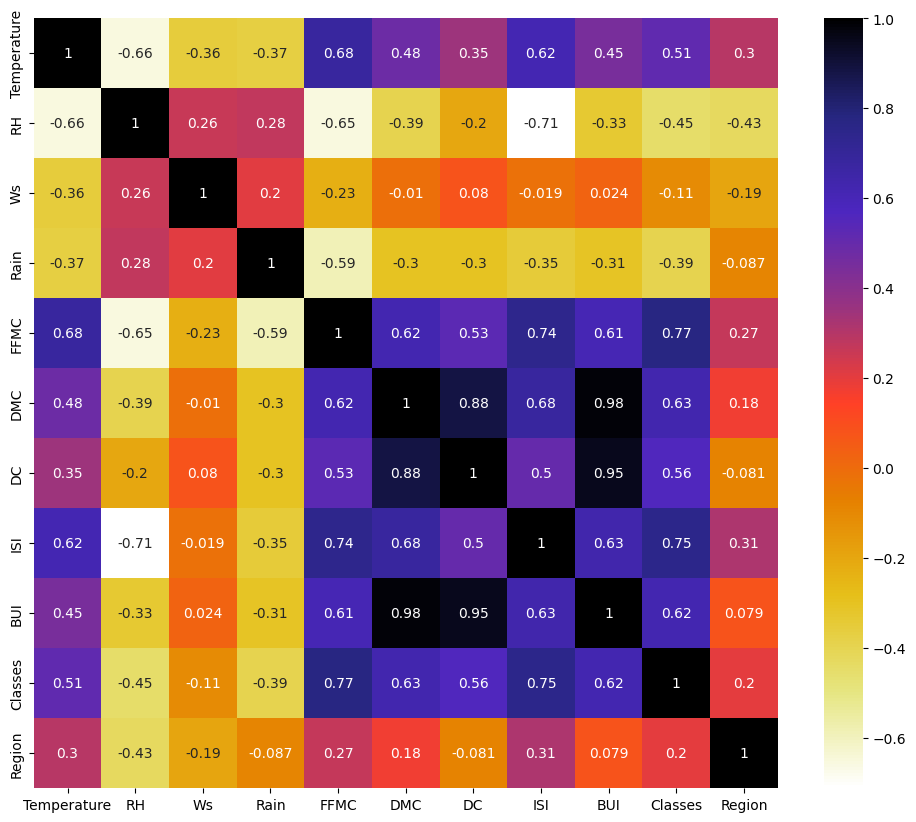

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.75)

In [ ]:
# features which has correlation more than 0.75
corr_features

{'BUI', 'Classes', 'DC'}

In [ ]:
# drop features which has correlation more than 0.75
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((182, 8), (61, 8))

## 4.4 Feature scaling Applying Standardization

In [ ]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

In [ ]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

**Box plot the dataset to understand effect of standard scaler**

Text(0.5, 1.0, 'X_train After Scaling')

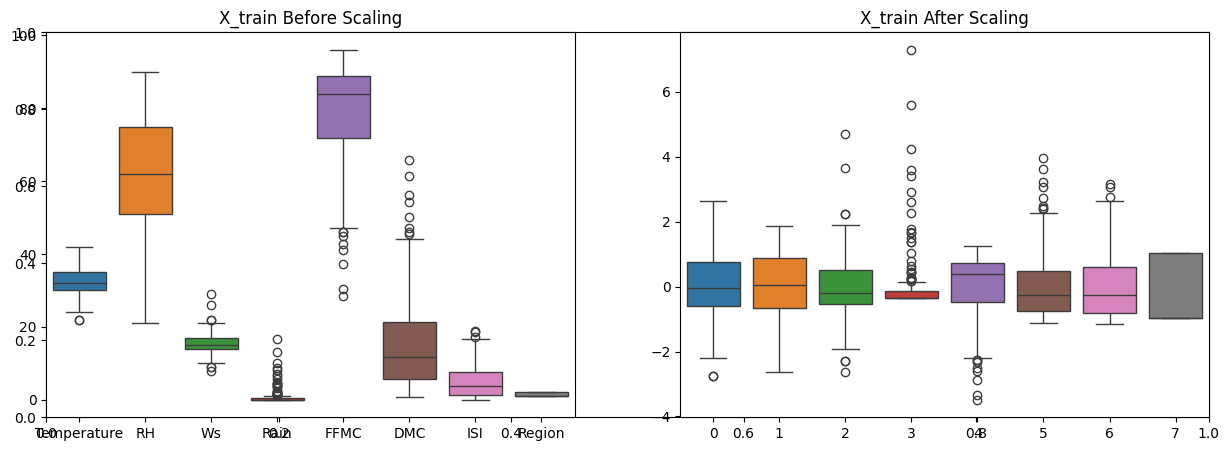

In [ ]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

**0=Temperature, 1 = RH, 2 = Ws, 3 = Rain, 4 = FFMC,5 = DMC, 6 = ISI,7 = Region**

## 4.7 Hyperparameter Tuning

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
mae = mean_absolute_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)


print("Random Forest Regressor")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Regressor
R2 Score value: 0.9781
MAE value: 0.5927


### Tuning Random Forest Regressor

In [ ]:
param_grid =[{'bootstrap': [True, False],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120],
'max_features': ['auto', 'sqrt'],
'min_samples_leaf': [1, 3, 4],
'min_samples_split': [2, 6, 10],
'n_estimators': [5, 20, 50, 100]}]

f_reg = RandomForestRegressor()
Random_rf = RandomizedSearchCV(f_reg,param_grid, cv = 10, verbose=2,n_jobs = -1)
Random_rf.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 20, 30, 40, 50, 60,
                                                       70, 80, 90, 100, 110,
                                                       120],
                                         'max_features': ['auto', 'sqrt'],
                                         'min_samples_leaf': [1, 3, 4],
                                         'min_samples_split': [2, 6, 10],
                                         'n_estimators': [5, 20, 50, 100]}],
                   verbose=2)

In [ ]:
best_random_grid=Random_rf.best_estimator_

bestrf_pred = best_random_grid.predict(X_test_scaled)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)


print("Random Forest Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Tuned
R2 Score value: 0.9762
MAE value: 0.6909


### **Tuning Ridge Regression**

Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, ridge_pred)
r2 = r2_score(y_test, ridge_pred)


print("Ridge Regression")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Ridge Regression
R2 Score value: 0.9690
MAE value: 0.6648


In [ ]:
from sklearn.exceptions import FitFailedWarning, ConvergenceWarning
import warnings
warnings.filterwarnings(action= 'ignore')
ridge_params = [{'alpha': (np.logspace(-11, 11, 100)),
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}]

ridge = Ridge()
random_ridge = RandomizedSearchCV(ridge, ridge_params, cv=10, n_jobs= -1)
random_ridge.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
                   param_distributions=[{'alpha': array([1.00000000e-11, 1.66810054e-11, 2.78255940e-11, 4.64158883e-11,
       7.74263683e-11, 1.29154967e-10, 2.15443469e-10, 3.59381366e-10,
       5.99484250e-10, 1.00000000e-09, 1.66810054e-09, 2.78255940e-09,
       4.64158883e-09, 7.74263683e-09, 1.29154967e-08, 2.15443469e-08,
       3.59381366e-08, 5.994...
       5.99484250e+06, 1.00000000e+07, 1.66810054e+07, 2.78255940e+07,
       4.64158883e+07, 7.74263683e+07, 1.29154967e+08, 2.15443469e+08,
       3.59381366e+08, 5.99484250e+08, 1.00000000e+09, 1.66810054e+09,
       2.78255940e+09, 4.64158883e+09, 7.74263683e+09, 1.29154967e+10,
       2.15443469e+10, 3.59381366e+10, 5.99484250e+10, 1.00000000e+11]),
                                         'solver': ['auto', 'svd', 'cholesky',
                                                    'lsqr', 'sparse_cg', 'sag',
                                                    'saga', 'lbfgs']}])

In [ ]:
best_ridge = random_ridge.best_estimator_

rbest_pred = best_ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, rbest_pred)
r2 = r2_score(y_test, rbest_pred)


print("Random Forest Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Tuned
R2 Score value: 0.9700
MAE value: 0.6458


#### Feature removal

**For** Selecting the 5 most important features that are helpful in predicting the fire since we it would be pain to front end user to fill all 8 features on the web app. I will drop the rest of features so we can build an interactive and user friendly web app.

In [ ]:
feature_importances = Random_rf.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
4,FFMC,0.286978
5,DMC,0.279998
6,ISI,0.248154
3,Rain,0.061318
1,RH,0.058133
0,Temperature,0.046290
2,Ws,0.013189
7,Region,0.005940


Text(0, 0.5, 'Features')

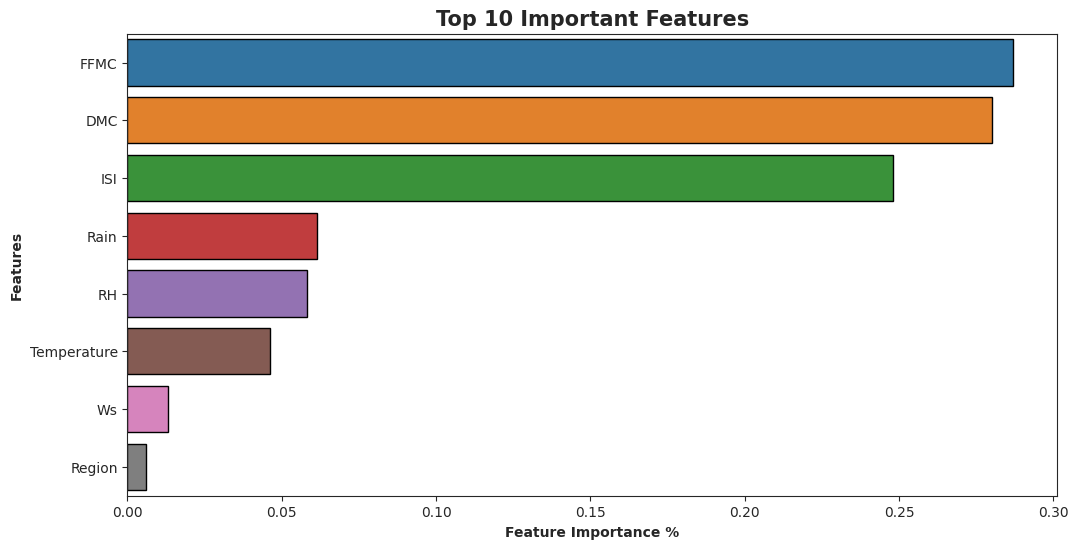

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature',ec = 'black', palette="tab10")
ax.set_title('Top 10 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')

### Model for deployment

In [ ]:
Xtrain_new = X_train.drop(['Region', 'Ws'], axis=1)
Xtest_new = X_test.drop(['Region', 'Ws'], axis=1)

In [ ]:
Xtrain_new.columns

Index(['Temperature', 'RH', 'Rain', 'FFMC', 'DMC', 'ISI'], dtype='object')

In [ ]:
Xtrain_new_scaled, Xtest_new_scaled = scaler_standard(Xtrain_new, Xtest_new)

In [ ]:
best_random_grid.fit(Xtrain_new_scaled, y_train)
bestrf_pred = best_random_grid.predict(Xtest_new_scaled)
mae = mean_absolute_error(y_test, bestrf_pred)
r2 = r2_score(y_test, bestrf_pred)


print("Random Forest Tuned")
print ("R2 Score value: {:.4f}".format(r2))
print ("MAE value: {:.4f}".format(mae))

Random Forest Tuned
R2 Score value: 0.9774
MAE value: 0.6680


In [ ]:
import bz2,pickle
file = bz2.BZ2File('regression.pkl','wb')
pickle.dump(best_random_grid,file)
file.close()

# 6. Model Selection For Classification
* Now start the model selection process where we try out bunch of different models.
* Choose some and fine tune and Finalize one model

## 6.1 Import Libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

### 6.2 Data Preprocessing for Classification

In [ ]:
X = df.drop('Classes',axis=1)
y= df['Classes']

In [ ]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=36)
X_train.shape, X_test.shape

((170, 11), (73, 11))

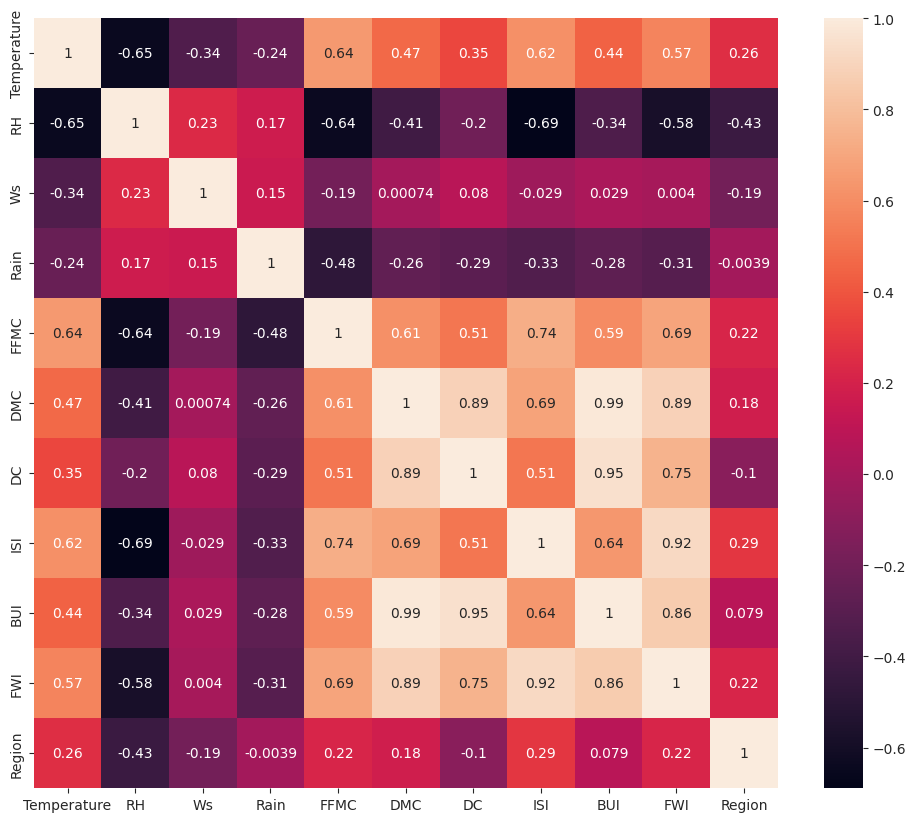

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [ ]:
corr_features = correlation(X_train, 0.75)

In [ ]:
corr_features

{'BUI', 'DC', 'FWI'}

In [ ]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((170, 8), (73, 8))

In [ ]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

## 6.3 Logistic Regression

In [ ]:
# Import Logistic Regression to Train from SKlearn
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_scaled,y_train)
logreg_pred = logreg.predict(X_test_scaled)
score = accuracy_score(y_test,logreg_pred)
cr = classification_report(y_test,logreg_pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Logistic Regression
Accuracy Score value: 0.9589
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.98      0.96      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.96      0.95        73
weighted avg       0.96      0.96      0.96        73



| Metrics     | Definition  |
| ----------- | ----------- |
| Precision      | Precision is defined as the ratio of true positives to the sum of true and false positives.       |
| Recall   | Recall is defined as the ratio of true positives to the sum of true positives and false negatives.        |
| F1 Score  | The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.   |

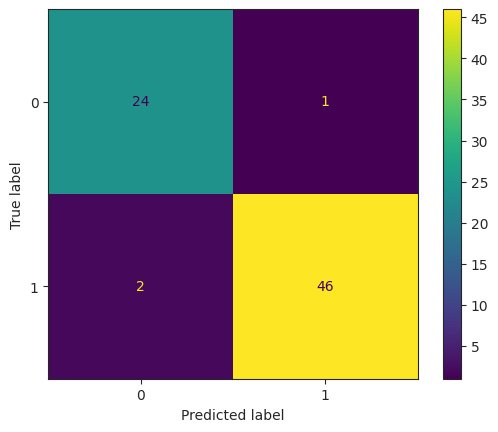

In [ ]:
loreg_cm = ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test)

## Neural Network Model

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Build and train a simple Neural Network
nn = MLPClassifier(hidden_layer_sizes=(64, 32),  # two hidden layers
                   activation='relu',
                   solver='adam',
                   max_iter=500,
                   random_state=42)

nn.fit(X_train_scaled, y_train)

# Predictions
nn_pred = nn.predict(X_test_scaled)

# Evaluation
score = accuracy_score(y_test, nn_pred)
cr = classification_report(y_test, nn_pred)

print("Neural Network (MLPClassifier)")
print("Accuracy Score value: {:.4f}".format(score))
print(cr)

Neural Network (MLPClassifier)
Accuracy Score value: 0.9589
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.98      0.96      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.96      0.95        73
weighted avg       0.96      0.96      0.96        73



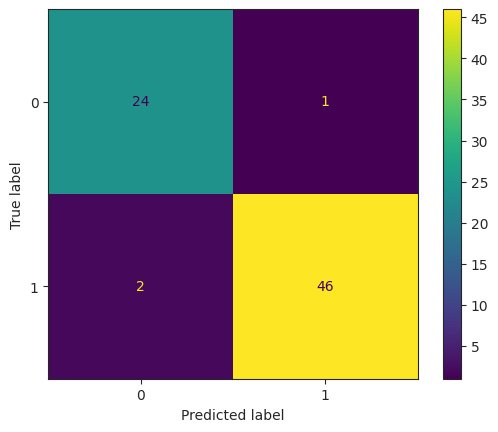

In [ ]:
nn_cm = ConfusionMatrixDisplay.from_estimator(nn, X_test_scaled, y_test)

## 6.5 Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)
rf_pred = rf.predict(X_test_scaled)
score = accuracy_score(y_test,rf_pred)
cr = classification_report(y_test,rf_pred)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Random Forest
Accuracy Score value: 0.9589
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.94      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



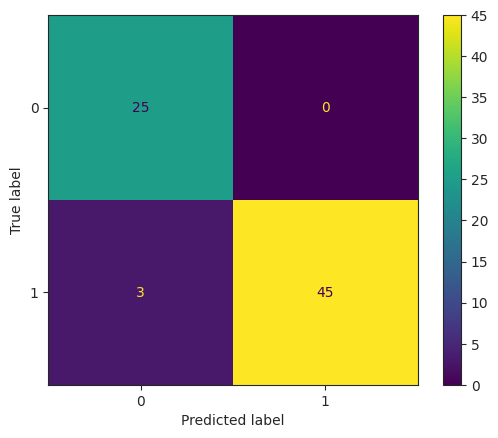

In [ ]:
rf_cm = ConfusionMatrixDisplay.from_estimator(rfc, X_test_scaled, y_test)

## 6.7 XGboost Model

In [ ]:
# Import KNeighborsClassifier to Train from SKlearn
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)
xgb_pred = xgb.predict(X_test_scaled)
score = accuracy_score(y_test, xgb_pred)
cr = classification_report(y_test, xgb_pred)

print("XGboost Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

XGboost Classifier
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.96      0.98        48

    accuracy                           0.97        73
   macro avg       0.96      0.98      0.97        73
weighted avg       0.97      0.97      0.97        73



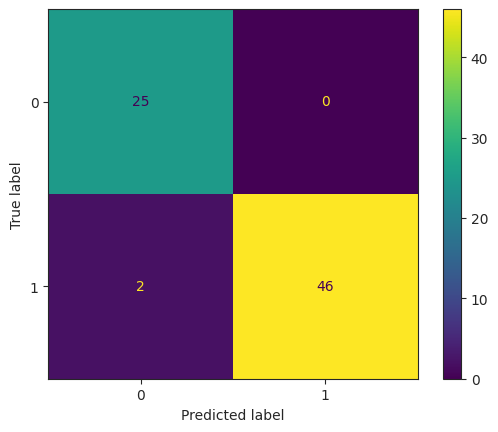

In [ ]:
xgb_cm = ConfusionMatrixDisplay.from_estimator(xgb, X_test_scaled, y_test)

## 6.8 HyperParameter Tuning

### **XGboost classifier Tuning**

In [ ]:
params={
 "learning_rate"    : (np.linspace(0,10, 100)) ,
 "max_depth"        : (np.linspace(1,50, 25,dtype=int)),
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]}
Rcv_xgb = RandomizedSearchCV(xgb, params, cv = 10,n_jobs = -1)
Rcv_xgb.fit(X_train_scaled, y_train).best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=np.float64(0.8080808080808081), max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=np.int64(11), max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
xgb_best = Rcv_xgb.best_estimator_
xgb_best.score(X_test_scaled,y_test)
bestxgb_pred = xgb_best.predict(X_test_scaled)
cr = classification_report(y_test,bestxgb_pred)
print("FINAL XGB")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL XGB
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.94      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



### **Random Forest classifier Tuning**

In [ ]:
params = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
Rcv_rf = RandomizedSearchCV(rf, params, cv = 10,n_jobs = -1)
Rcv_rf.fit(X_train_scaled, y_train).best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_samples_leaf=6, min_samples_split=3,
                       n_estimators=90)

In [ ]:
best_rf = Rcv_rf.best_estimator_
best_rf.score(X_test_scaled,y_test)
bestrf_pred = best_rf.predict(X_test_scaled)
cr = classification_report(y_test,bestrf_pred)
print("FINAL Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL Random Forest
Accuracy Score value: 0.9726
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.94      0.97        48

    accuracy                           0.96        73
   macro avg       0.95      0.97      0.96        73
weighted avg       0.96      0.96      0.96        73



In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curves(models, x_test, y_test):
    plt.figure(figsize=(7, 5))
    plt.grid(True)

    # Loop through each model
    for name, model in models.items():

        # ROC curve for test
        test_fpr, test_tpr, _ = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
        test_auc = auc(test_fpr, test_tpr)

        # Plot test ROC on the same chart
        plt.plot(test_fpr, test_tpr, linestyle="--",
                 label=f"{name} Test AUC = {test_auc:.3f}")

    # Random guess line
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

    # Labels and legend
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curves of All Models")
    plt.legend()
    plt.show()

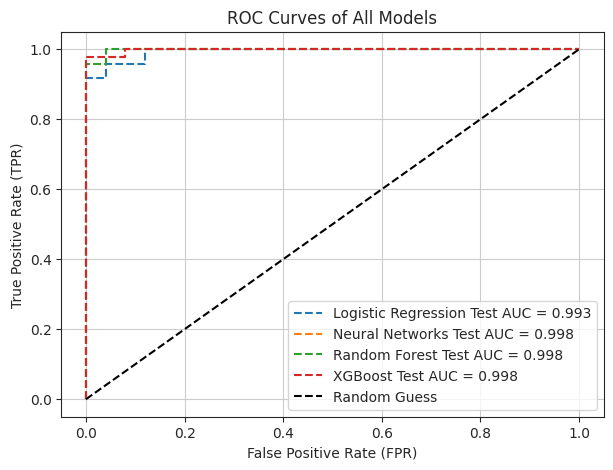

In [ ]:
models = {
    "Logistic Regression": logreg,
    "Neural Networks": nn,
    "Random Forest": best_rf,
    "XGBoost": xgb_best
}

plot_roc_curves(models, X_test_scaled, y_test)

From the above result XGBoost Classifier has given better Result so will proceed with that model for model Deployment

### Fetaure Importance for Model

---



In [ ]:
feature_importances = Rcv_xgb.best_estimator_.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
5,DMC,0.583099
4,FFMC,0.149720
3,Rain,0.086828
1,RH,0.078500
6,ISI,0.059937
0,Temperature,0.041916
2,Ws,0.000000
7,Region,0.000000


Text(0, 0.5, 'Features')

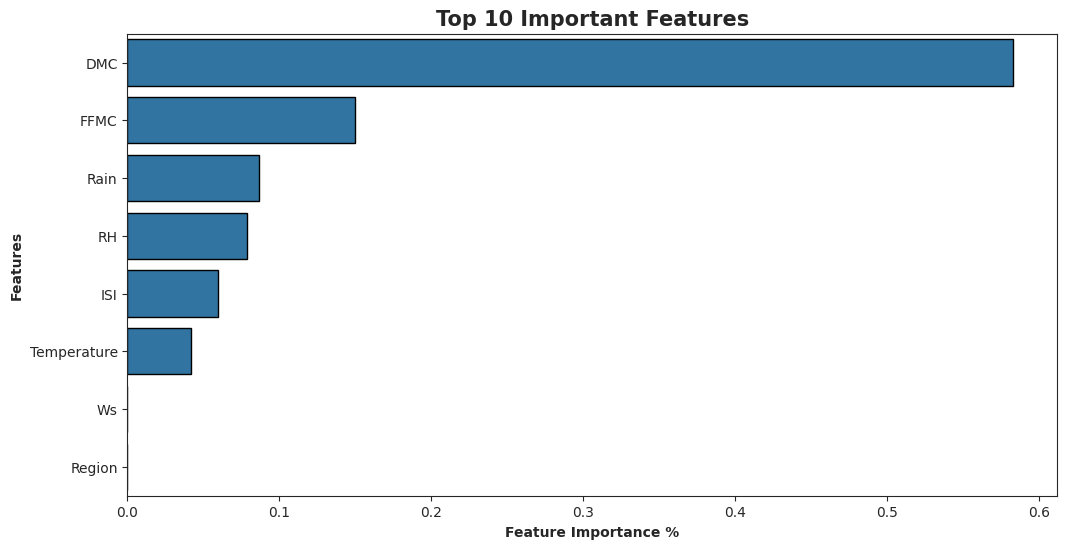

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('ticks')
ax = sns.barplot(data=importance_df, x='importance', y='feature',ec = 'black')
ax.set_title('Top 10 Important Features', weight='bold',fontsize = 15)
ax.set_xlabel('Feature Importance %',weight='bold')
ax.set_ylabel('Features',weight='bold')

In [ ]:
#Compresssing the pickle file which has 5 features to build Web Application
import bz2,pickle
file = bz2.BZ2File('classification.pkl','wb')
pickle.dump(xgb_model,file)
file.close()

## Conclusion

* This prediction can be used for calculating if the fire is possible at the location based on inputs.
* Both classification and regression models were completed and deployed.